## Import data

In [18]:
from impedance import preprocessing

# Load data from the example EIS result
frequencies, Z = preprocessing.readCSV('./exampleData.csv')

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

## Define impedance model

In [37]:
from impedance.models.circuits import CustomCircuit

initial_guess = [.001, .5, 100, .01, .05, 100, 1]
circuit = CustomCircuit('R0-p(R1,C1)-p(R2-Wo1,C2)', initial_guess=initial_guess)

## Fit the impedance model to data

In [38]:
circuit.fit(frequencies, Z)

print(circuit)


Circuit string: R0-p(R1,C1)-p(R2-Wo1,C2)
Fit: True

Initial guesses:
     R0 = 1.00e-03 [Ohm]
     R1 = 5.00e-01 [Ohm]
     C1 = 1.00e+02 [F]
     R2 = 1.00e-02 [Ohm]
  Wo1_0 = 5.00e-02 [Ohm]
  Wo1_1 = 1.00e+02 [sec]
     C2 = 1.00e+00 [F]

Fit parameters:
     R0 = 1.65e-02  (+/- 1.32e-04) [Ohm]
     R1 = 8.78e-03  (+/- 1.65e-04) [Ohm]
     C1 = 3.41e+00  (+/- 1.65e-01) [F]
     R2 = 5.45e-03  (+/- 1.77e-04) [Ohm]
  Wo1_0 = 1.43e-01  (+/- 1.29e-01) [Ohm]
  Wo1_1 = 1.30e+03  (+/- 2.34e+03) [sec]
     C2 = 2.23e-01  (+/- 1.51e-02) [F]



## Analyze/Visualize the results

In [39]:
Z_fit = circuit.predict(frequencies)

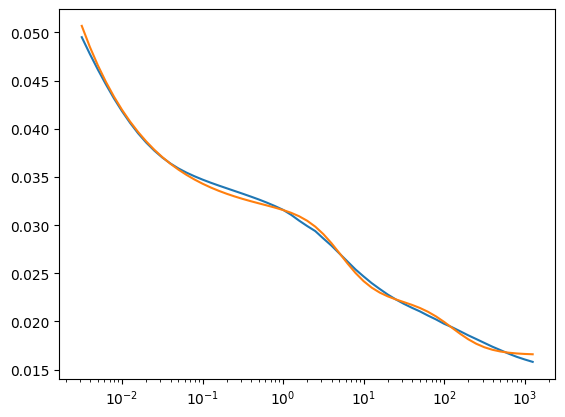

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(frequencies,Z.real)
plt.plot(frequencies,Z_fit.real)
plt.xscale('log')
plt.show()

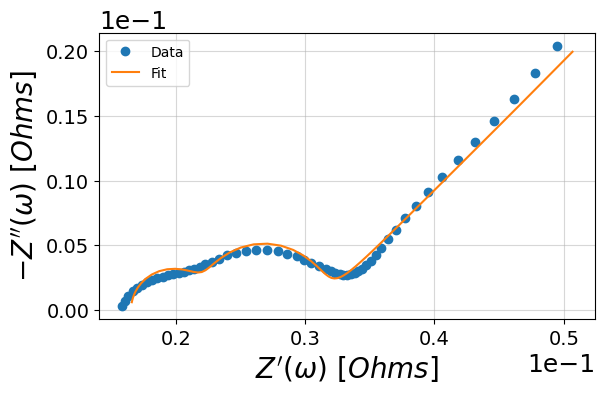

In [41]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()

In [42]:
fig.savefig('example_fit_fig.png', dpi=300, bbox_inches='tight')

In [25]:
circuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)